# Context:

This case is about a bank (Thera Bank) whose management wants to explore ways of converting its liability customers to personal loan customers (while retaining them as depositors). A campaign that the bank ran last year for liability customers showed a healthy conversion rate of over 9% success. This has encouraged the retail marketing department to devise campaigns with better target marketing to increase the success ratio with a minimal budget.

# Attribute Information:

- **ID:** Customer ID.
- **Age:** Customer's age in completed years.
- **Experience**: Years of professional experience.
- **Income**: Annual income of the customer.
- **ZIP Code**: Home Address ZIP code.
- **Family**: Family size of the customer.
- **CCAvg**: Avg. spending on credit cards per month.
- **Education**: Education Level. 1: Undergrad; 2: Graduate; 3:  Advanced/Professional.
- **Mortgage**: Value of house mortgage if any.
- **Personal Loan**: Did this customer accept the personal loan offered in the last campaign?
- **Securities Account**: Does the customer have a securities account with the bank?
- **CD Account**: Does the customer have a certificate of deposit (CD) account with the bank?
- **Online**: Does the customer use internet banking facilities?
- **Credit card**: Does the customer use a credit card issued by the bank?

# Objective:

The classification goal is to predict the likelihood of a liability customer buying personal loans.

- Create a model that predicts the probablity of a liability customer buying a personal loan

In [1]:
import pandas as pd
from sklearn.linear_model import LogisticRegression

# Importing ploting libraries
import matplotlib.pyplot as plt
# To enable plotting graphs in Jupyter notebook
%matplotlib inline

# Importing seaborn for statistical plots
import seaborn as sns

# Let us break the X and y dataframes into training set and test set. For this we will use
# SKlearn package's data splitting function which is based on random function

from sklearn.model_selection import train_test_split

import numpy as np
import os,sys

# Calculate accuracy measures and confusion matrix
from sklearn import metrics

In [2]:
df = pd.read_csv('Bank_Personal_Loan_Modelling.csv')
df.head()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1


In [3]:
cr_df = df.drop('ID', axis=1) # dropping this column as it will be 1-1 mapping anyways
cr_df.head()

,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,35,8,45,91330,4,1.0,2,0,0,0,0,0,1


In [4]:
cr_df.Income = df.Income.apply(lambda x: x * 1000)
cr_df

,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,25,1,49000,91107,4,1.6,1,0,0,1,0,0,0
1,45,19,34000,90089,3,1.5,1,0,0,1,0,0,0
2,39,15,11000,94720,1,1.0,1,0,0,0,0,0,0
3,35,9,100000,94112,1,2.7,2,0,0,0,0,0,0
4,35,8,45000,91330,4,1.0,2,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,29,3,40000,92697,1,1.9,3,0,0,0,0,1,0
4996,30,4,15000,92037,4,0.4,1,85,0,0,0,1,0
4997,63,39,24000,93023,2,0.3,3,0,0,0,0,0,0
4998,65,40,49000,90034,3,0.5,2,0,0,0,0,1,0


In [5]:
cr_df.CCAvg = df.CCAvg.apply(lambda x: x * 1000)
cr_df

,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,25,1,49000,91107,4,1600.0,1,0,0,1,0,0,0
1,45,19,34000,90089,3,1500.0,1,0,0,1,0,0,0
2,39,15,11000,94720,1,1000.0,1,0,0,0,0,0,0
3,35,9,100000,94112,1,2700.0,2,0,0,0,0,0,0
4,35,8,45000,91330,4,1000.0,2,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,29,3,40000,92697,1,1900.0,3,0,0,0,0,1,0
4996,30,4,15000,92037,4,400.0,1,85,0,0,0,1,0
4997,63,39,24000,93023,2,300.0,3,0,0,0,0,0,0
4998,65,40,49000,90034,3,500.0,2,0,0,0,0,1,0


In [6]:
cr_df.Mortgage = df.Mortgage.apply(lambda x: x * 1000)
cr_df

,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,25,1,49000,91107,4,1600.0,1,0,0,1,0,0,0
1,45,19,34000,90089,3,1500.0,1,0,0,1,0,0,0
2,39,15,11000,94720,1,1000.0,1,0,0,0,0,0,0
3,35,9,100000,94112,1,2700.0,2,0,0,0,0,0,0
4,35,8,45000,91330,4,1000.0,2,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,29,3,40000,92697,1,1900.0,3,0,0,0,0,1,0
4996,30,4,15000,92037,4,400.0,1,85000,0,0,0,1,0
4997,63,39,24000,93023,2,300.0,3,0,0,0,0,0,0
4998,65,40,49000,90034,3,500.0,2,0,0,0,0,1,0


In [7]:
cr_df.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,5000.0,45.3384,11.463166,23.0,35.0,45.0,55.0,67.0
Experience,5000.0,20.1046,11.467954,-3.0,10.0,20.0,30.0,43.0
Income,5000.0,73774.2000,46033.729321,8000.0,39000.0,64000.0,98000.0,224000.0
ZIP Code,5000.0,93152.5030,2121.852197,9307.0,91911.0,93437.0,94608.0,96651.0
Family,5000.0,2.3964,1.147663,1.0,1.0,2.0,3.0,4.0
CCAvg,5000.0,1937.9380,1747.658980,0.0,700.0,1500.0,2500.0,10000.0
Education,5000.0,1.8810,0.839869,1.0,1.0,2.0,3.0,3.0
Mortgage,5000.0,56498.8000,101713.802102,0.0,0.0,0.0,101000.0,635000.0
Personal Loan,5000.0,0.0960,0.294621,0.0,0.0,0.0,0.0,1.0
Securities Account,5000.0,0.1044,0.305809,0.0,0.0,0.0,0.0,1.0


In [8]:
cr_df.corr()

,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
Age,1.000000,0.994215,-0.055269,-0.029216,-0.046418,-0.052012,0.041334,-0.012539,-0.007726,-0.000436,0.008043,0.013702,0.007681
Experience,0.994215,1.000000,-0.046574,-0.028626,-0.052563,-0.050077,0.013152,-0.010582,-0.007413,-0.001232,0.010353,0.013898,0.008967
Income,-0.055269,-0.046574,1.000000,-0.016410,-0.157501,0.645984,-0.187524,0.206806,0.502462,-0.002616,0.169738,0.014206,-0.002385
ZIP Code,-0.029216,-0.028626,-0.016410,1.000000,0.011778,-0.004061,-0.017377,0.007383,0.000107,0.004704,0.019972,0.016990,0.007691
Family,-0.046418,-0.052563,-0.157501,0.011778,1.000000,-0.109275,0.064929,-0.020445,0.061367,0.019994,0.014110,0.010354,0.011588
CCAvg,-0.052012,-0.050077,0.645984,-0.004061,-0.109275,1.000000,-0.136124,0.109905,0.366889,0.015086,0.136534,-0.003611,-0.006689
Education,0.041334,0.013152,-0.187524,-0.017377,0.064929,-0.136124,1.000000,-0.033327,0.136722,-0.010812,0.013934,-0.015004,-0.011014
Mortgage,-0.012539,-0.010582,0.206806,0.007383,-0.020445,0.109905,-0.033327,1.000000,0.142095,-0.005411,0.089311,-0.005995,-0.007231
Personal Loan,-0.007726,-0.007413,0.502462,0.000107,0.061367,0.366889,0.136722,0.142095,1.000000,0.021954,0.316355,0.006278,0.002802
Securities Account,-0.000436,-0.001232,-0.002616,0.004704,0.019994,0.015086,-0.010812,-0.005411,0.021954,1.000000,0.317034,0.012627,-0.015028


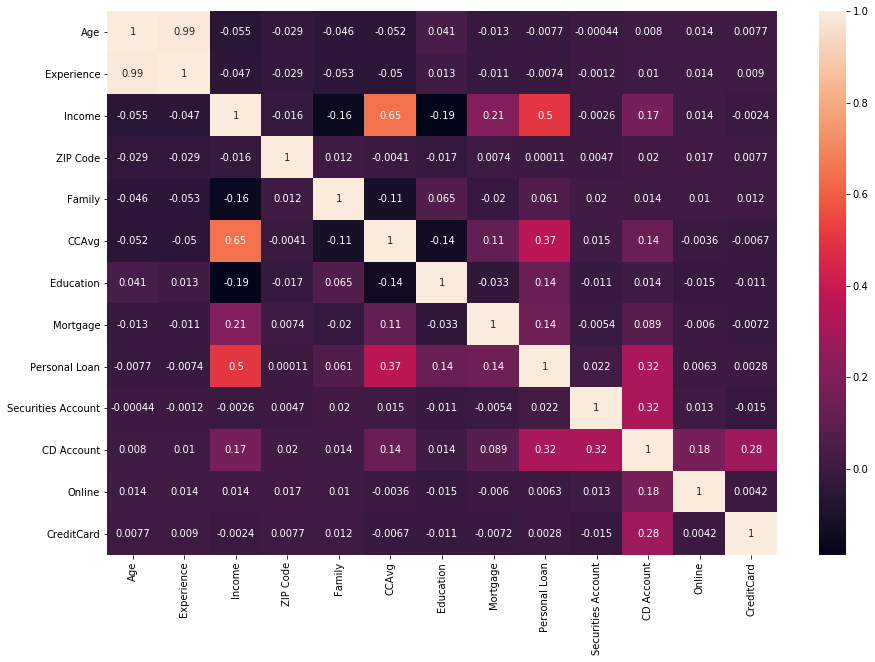

In [9]:
plt.figure(figsize = (15,10))
sns.heatmap(cr_df.corr(), annot = True)

In [10]:
cr_df=cr_df.drop('Experience', axis=1) # Due to extremely high correlation I can drop experience
cr_df=cr_df.drop('ZIP Code', axis=1) # Due to no additional information provided if carried through

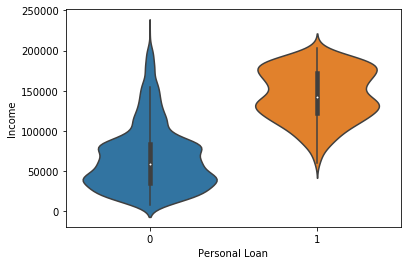

In [11]:
sns.violinplot(y=cr_df["Income"],x=cr_df['Personal Loan'])

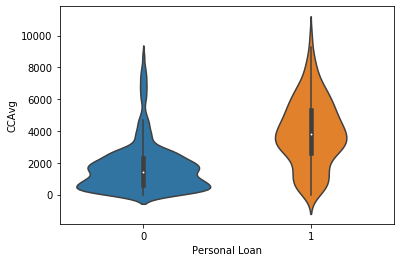

In [12]:
sns.violinplot(y=cr_df["CCAvg"],x=cr_df['Personal Loan'])

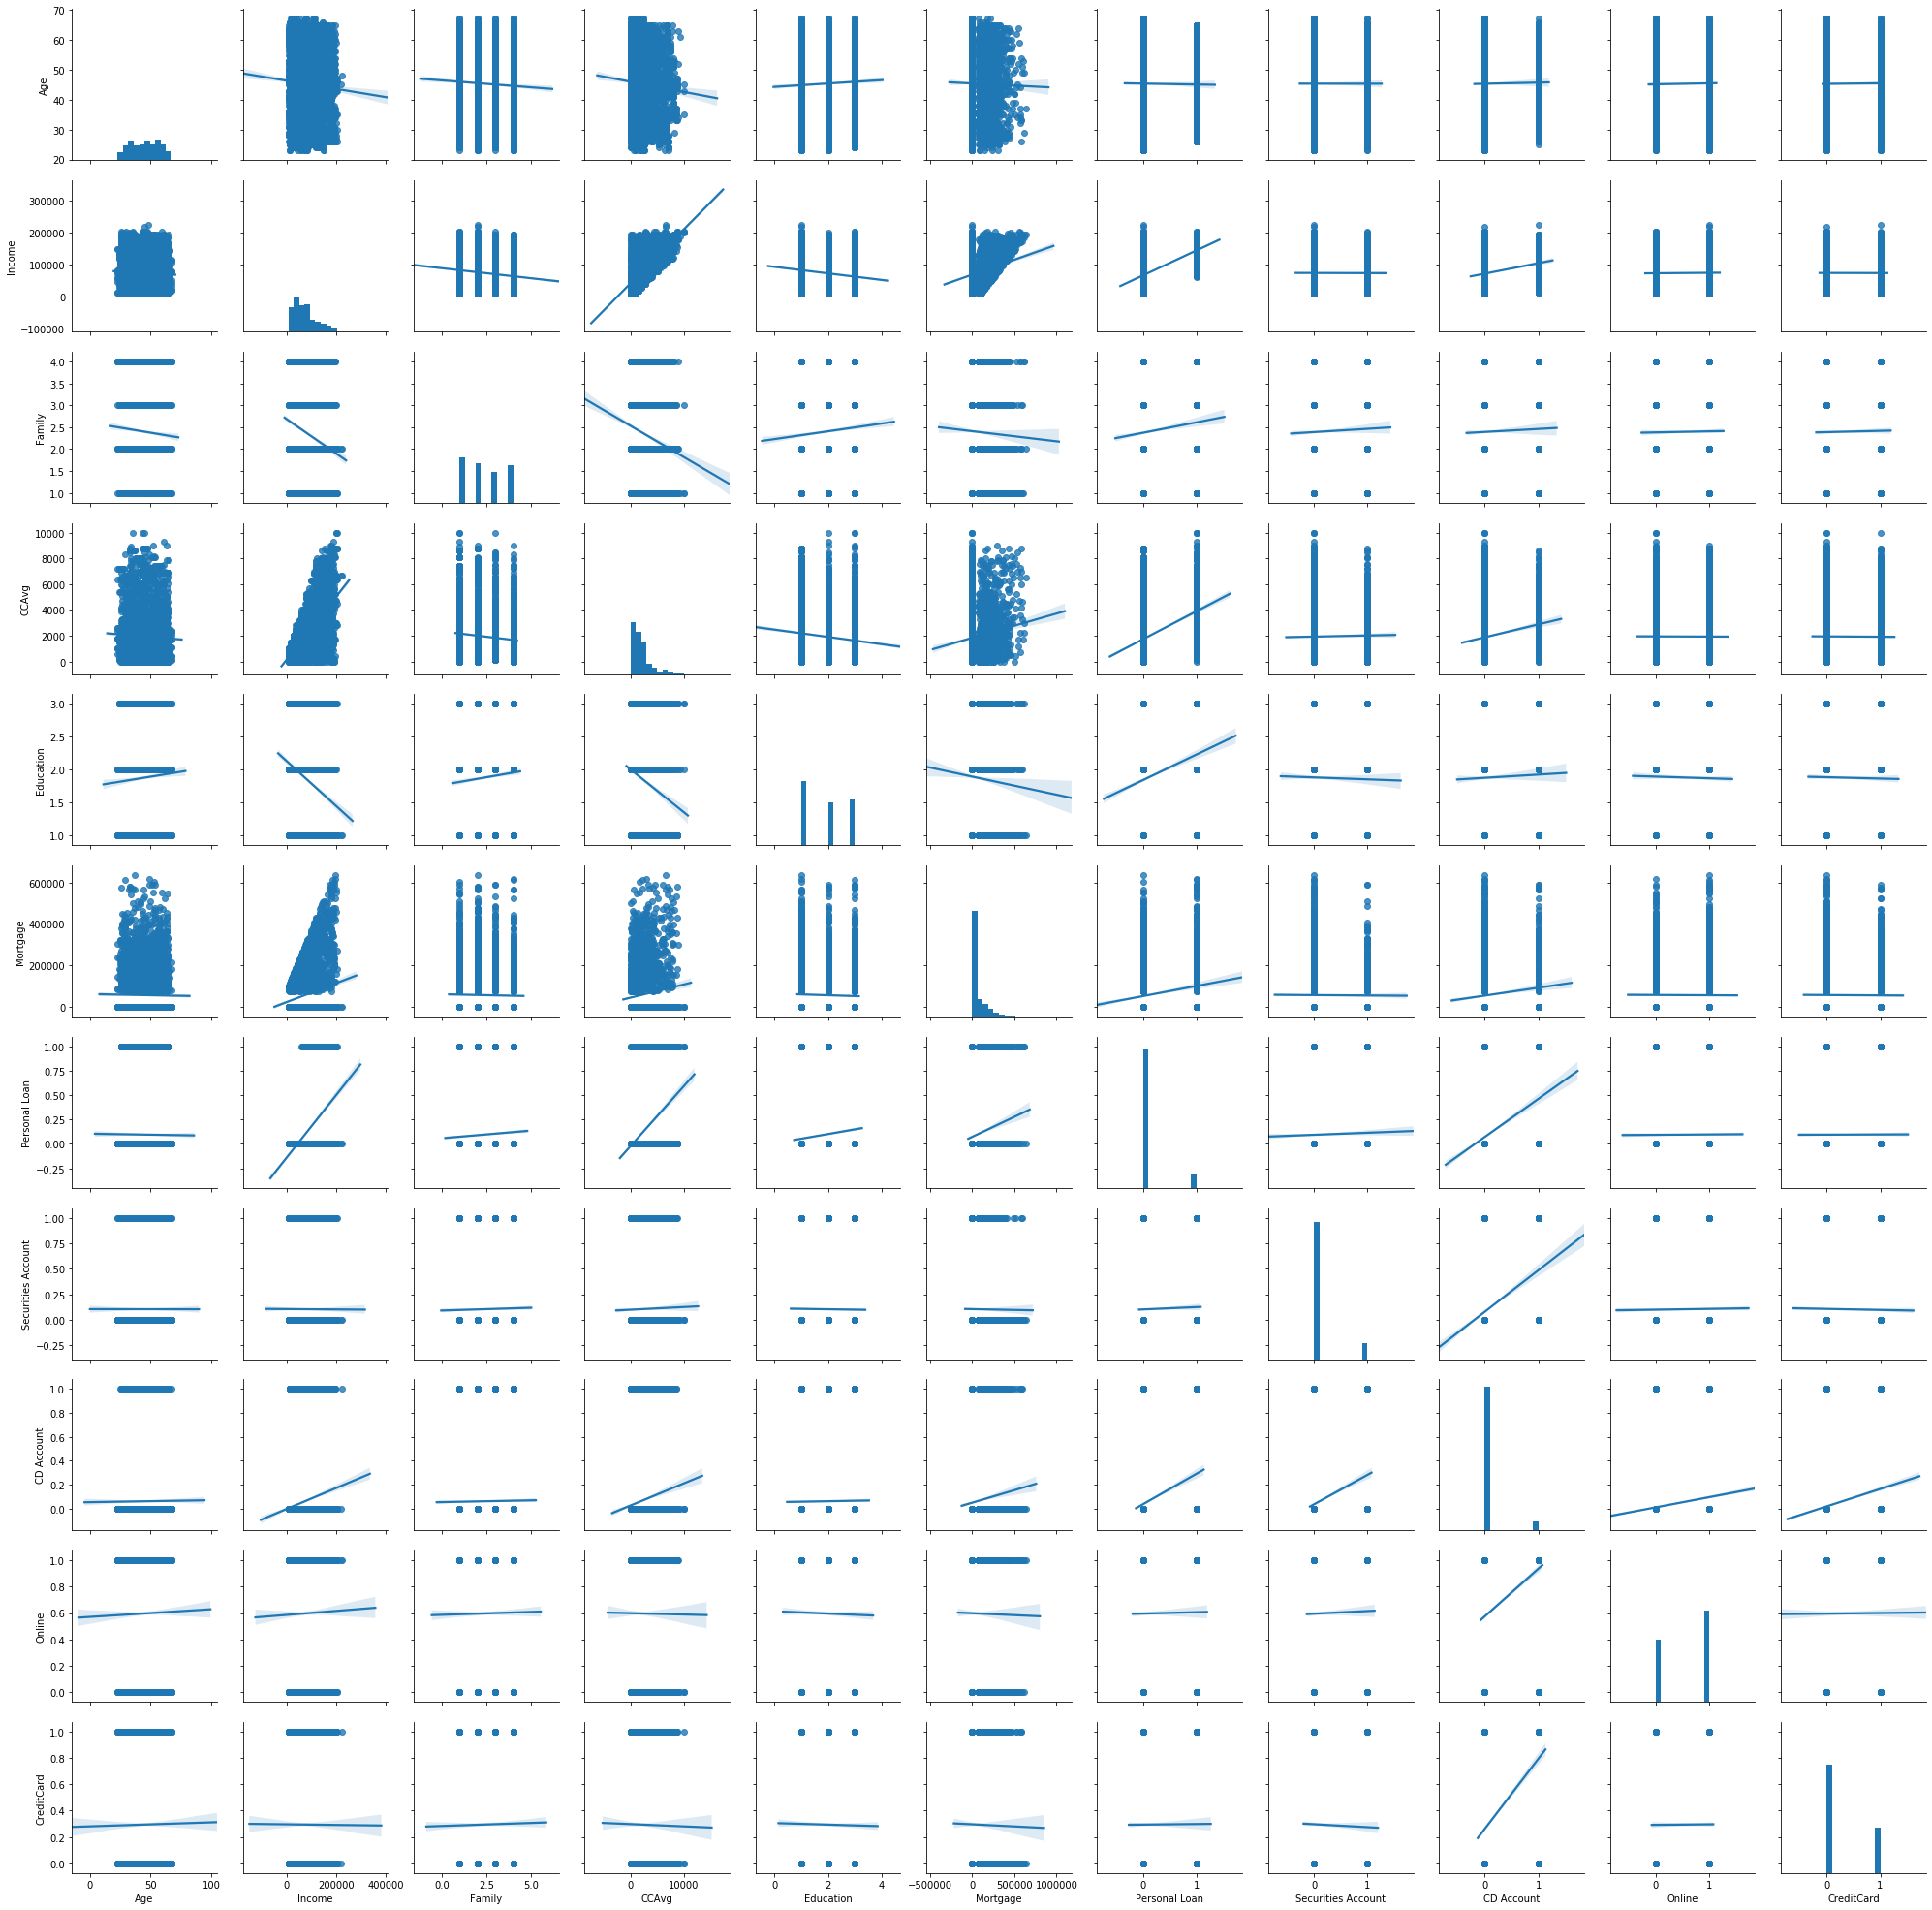

In [13]:
sns.pairplot(cr_df, kind="reg", diag_kind="hist", height=2.5)

In [14]:
cr_df.isnull().sum()

Age                   0
Income                0
Family                0
CCAvg                 0
Education             0
Mortgage              0
Personal Loan         0
Securities Account    0
CD Account            0
Online                0
CreditCard            0
dtype: int64

In [15]:
cr_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 11 columns):
Age                   5000 non-null int64
Income                5000 non-null int64
Family                5000 non-null int64
CCAvg                 5000 non-null float64
Education             5000 non-null int64
Mortgage              5000 non-null int64
Personal Loan         5000 non-null int64
Securities Account    5000 non-null int64
CD Account            5000 non-null int64
Online                5000 non-null int64
CreditCard            5000 non-null int64
dtypes: float64(1), int64(10)
memory usage: 429.8 KB


In [17]:
# Convert variables to categorical and int64

cr_df['Family'] = cr_df['Family'].astype('category')
cr_df['Education'] = cr_df['Education'].astype('category')
cr_df['Personal Loan'] = cr_df['Personal Loan'].astype('category')
cr_df['CD Account'] = cr_df['CD Account'].astype('category')
cr_df['CreditCard'] = cr_df['CreditCard'].astype('category')
cr_df['Online'] = cr_df['Online'].astype('category')
cr_df['Securities Account'] = cr_df['Securities Account'].astype('category')

cr_df['CCAvg'] = cr_df['CCAvg'].astype('int64')

In [18]:
cr_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 11 columns):
Age                   5000 non-null int64
Income                5000 non-null int64
Family                5000 non-null category
CCAvg                 5000 non-null int64
Education             5000 non-null category
Mortgage              5000 non-null int64
Personal Loan         5000 non-null category
Securities Account    5000 non-null category
CD Account            5000 non-null category
Online                5000 non-null category
CreditCard            5000 non-null category
dtypes: category(7), int64(4)
memory usage: 191.3 KB


In [19]:
# Number of unique in each column?

cr_df.nunique()

Age                    45
Income                162
Family                  4
CCAvg                 108
Education               3
Mortgage              347
Personal Loan           2
Securities Account      2
CD Account              2
Online                  2
CreditCard              2
dtype: int64

In [20]:
# Number of people with zero mortgage?

cr_df.Mortgage[cr_df.Mortgage == 0].value_counts()

0    3462
Name: Mortgage, dtype: int64

In [21]:
# Number of people with zero credit card spending per month?

cr_df.CCAvg[cr_df.CCAvg == 0].value_counts()

0    106
Name: CCAvg, dtype: int64

In [22]:
cr_df.skew()

Age                  -0.029341
Income                0.841339
Family                0.155221
CCAvg                 1.598443
Education             0.227093
Mortgage              2.104002
Personal Loan         2.743607
Securities Account    2.588268
CD Account            3.691714
Online               -0.394785
CreditCard            0.904589
dtype: float64

In [23]:
# Value counts of all categorical columns.

for i in list(cr_df.columns[cr_df.dtypes=='category']):   # checking value counts of all int64 type columns
    print(cr_df[i].value_counts())
    print()

1    1472
2    1296
4    1222
3    1010
Name: Family, dtype: int64

1    2096
3    1501
2    1403
Name: Education, dtype: int64

0    4520
1     480
Name: Personal Loan, dtype: int64

0    4478
1     522
Name: Securities Account, dtype: int64

0    4698
1     302
Name: CD Account, dtype: int64

1    2984
0    2016
Name: Online, dtype: int64

0    3530
1    1470
Name: CreditCard, dtype: int64



In [24]:
# Univariate and Bivariate

from scipy.stats import zscore

numeric_cols = cr_df.drop('Personal Loan', axis=1)

# This is the dependent variable
loan_values = pd.DataFrame(cr_df[['Personal Loan']])

numeric_cols = numeric_cols.apply(zscore)
cr_df_z = numeric_cols.join(loan_values)

cr_df_z.head()

,Age,Income,Family,CCAvg,Education,Mortgage,Securities Account,CD Account,Online,CreditCard,Personal Loan
0,-1.774417,-0.538229,1.397414,-0.193385,-1.049078,-0.555524,2.928915,-0.25354,-1.216618,-0.645314,0
1,-0.029524,-0.864109,0.525991,-0.250611,-1.049078,-0.555524,2.928915,-0.25354,-1.216618,-0.645314,0
2,-0.552992,-1.363793,-1.216855,-0.536736,-1.049078,-0.555524,-0.341423,-0.25354,-1.216618,-0.645314,0
3,-0.901970,0.569765,-1.216855,0.436091,0.141703,-0.555524,-0.341423,-0.25354,-1.216618,-0.645314,0
4,-0.901970,-0.625130,1.397414,-0.536736,0.141703,-0.555524,-0.341423,-0.25354,-1.216618,1.549632,0


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001C867A7C648>,
      dtype=object)

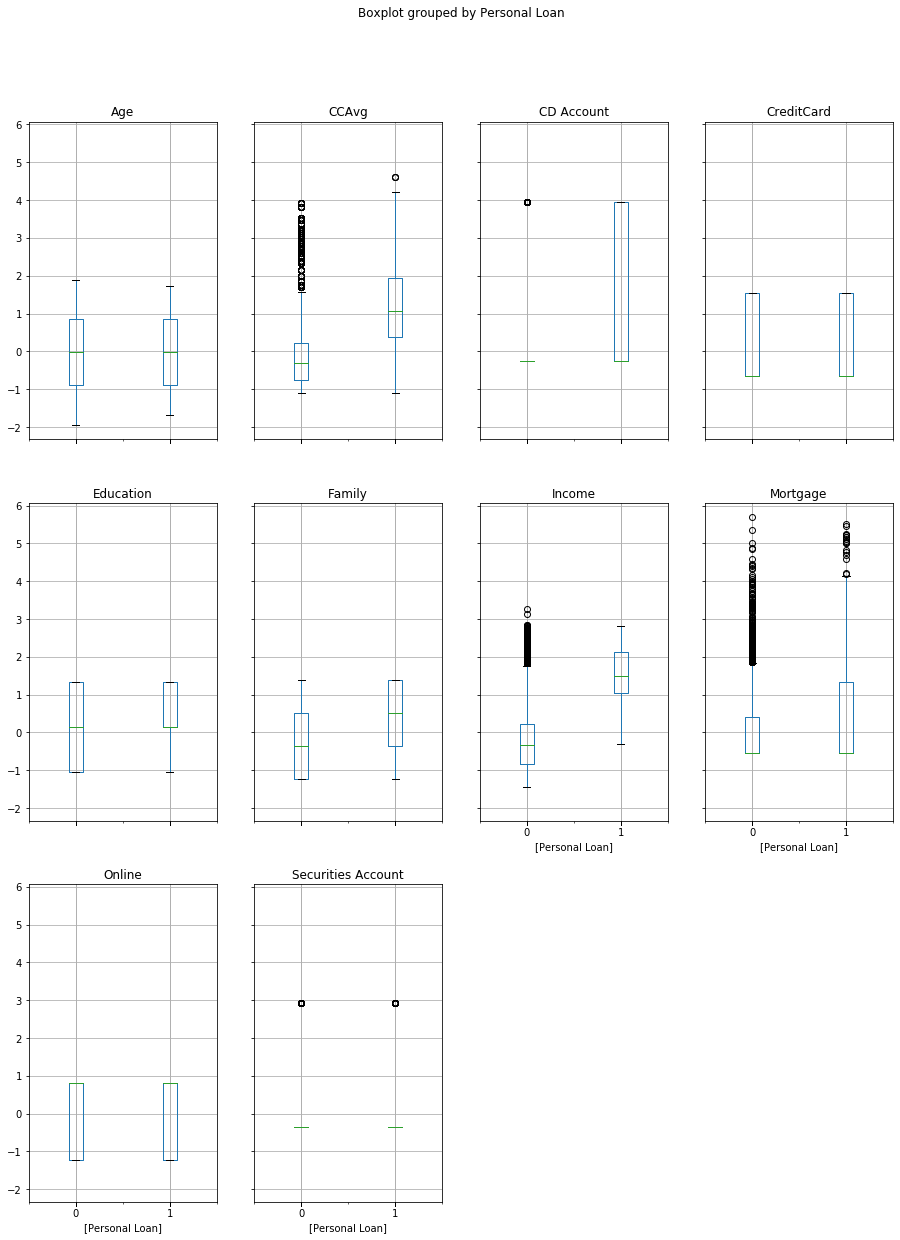

In [28]:
cr_df_z.boxplot(by='Personal Loan',  layout=(3,4), figsize=(15, 20))

In [29]:
from pandas_profiling import ProfileReport
profile = ProfileReport(cr_df, title='Pandas Profiling Report', html={'style':{'full_width':True}})

In [30]:
profile.to_widgets()

In [31]:
cr_df = cr_df.drop_duplicates()

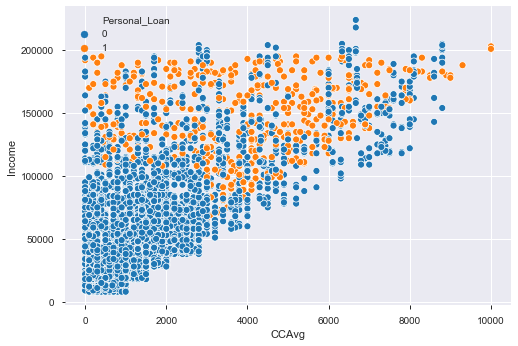

In [67]:
sns.scatterplot(x=cr_df.CCAvg, y=cr_df.Income, hue=cr_df.Personal_Loan);

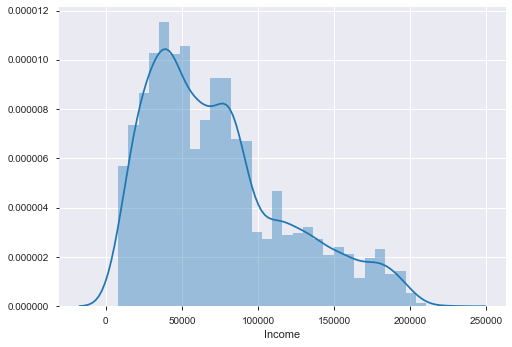

In [71]:
sns.distplot(cr_df.Income);

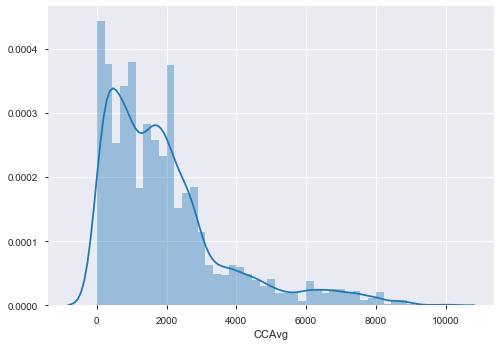

In [74]:
sns.distplot(cr_df.CCAvg);

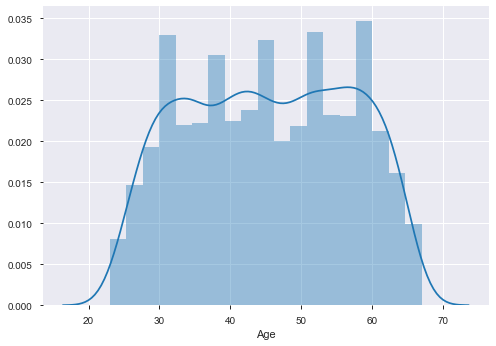

In [75]:
sns.distplot(cr_df.Age);

In [76]:
# Define X and Y variables

X = cr_df.drop('Personal_Loan', axis=1)
Y = cr_df[['Personal_Loan']]
print(X)
print(Y)

      Age  Income Family  CCAvg Education  Mortgage Securities_Account  \
0      25   49000      4   1600         1         0                  1   
1      45   34000      3   1500         1         0                  1   
2      39   11000      1   1000         1         0                  0   
3      35  100000      1   2700         2         0                  0   
4      35   45000      4   1000         2         0                  0   
...   ...     ...    ...    ...       ...       ...                ...   
4995   29   40000      1   1900         3         0                  0   
4996   30   15000      4    400         1     85000                  0   
4997   63   24000      2    300         3         0                  0   
4998   65   49000      3    500         2         0                  0   
4999   28   83000      3    800         1         0                  0   

     CD_Account Online CreditCard  
0             0      0          0  
1             0      0          0  
2  

In [77]:
# Get data model ready
# Convert categorical vriables to dummy variables

X = pd.get_dummies(X, drop_first=True)

In [78]:
# 3. Split the data into training and test set in the ratio of 70:30 respectively (5 marks)

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.30, random_state=1)

print(X_train)
print()
print(X_test)
print()
print(y_train)
print()
print(y_test)

      Age  Income  CCAvg  Mortgage  Family_2  Family_3  Family_4  Education_2  \
1965   45   94000    500         0         0         1         0            0   
664    54   64000   1800    227000         0         0         0            0   
1884   57  163000   7400         0         0         0         0            0   
4126   58   23000   1300    131000         0         1         0            1   
4743   50   21000    200         0         0         0         0            0   
...   ...     ...    ...       ...       ...       ...       ...          ...   
2900   52   55000   3200    151000         1         0         0            0   
2767   48   59000      0    144000         0         0         0            0   
906    29  154000   2000    130000         1         0         0            0   
3988   59   85000   3400         0         0         0         0            0   
235    38   71000   1800         0         0         0         1            0   

      Education_3  Securiti

In [79]:
# 4. Use Logistic Regression model to predict the likelihood of a customer buying personal loans.
# Print all the metrics related for evaluating the model performance (15 marks)

# Build the logistic regression model
# Statititions use this library for future statistical analysis

import statsmodels.api as sm

logit = sm.Logit(y_train, sm.add_constant(X_train))
lg = logit.fit()
lg

Optimization terminated successfully.
         Current function value: 0.118069
         Iterations 9


In [80]:
# The statisical significance of the variable

lg.pvalues

# smaller pvalue the more influential the value is
# ie here we look at the income as an example

const                   2.870550e-64
Age                     1.759313e-01
Income                  4.241292e-65
CCAvg                   1.273071e-02
Mortgage                3.291966e-01
Family_2                9.309413e-01
Family_3                2.593773e-12
Family_4                1.251788e-07
Education_2             1.690544e-31
Education_3             1.710980e-34
Securities_Account_1    1.669279e-02
CD_Account_1            7.599741e-18
Online_1                1.493501e-03
CreditCard_1            1.825684e-03
dtype: float64

In [81]:
# Summary of logistic regression

from scipy import stats

stats.chisqprob = (lambda chisq, df: stats.chi2.sf(chisq, df))

print(lg.summary())

# you would compaire this on shuffled data and see how it performs

                           Logit Regression Results                           
Dep. Variable:          Personal_Loan   No. Observations:                 3490
Model:                          Logit   Df Residuals:                     3476
Method:                           MLE   Df Model:                           13
Date:                Fri, 13 Mar 2020   Pseudo R-squ.:                  0.6227
Time:                        23:48:05   Log-Likelihood:                -412.06
converged:                       True   LL-Null:                       -1092.2
Covariance Type:            nonrobust   LLR p-value:                5.482e-283
                           coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                  -12.8432      0.759    -16.926      0.000     -14.330     -11.356
Age                      0.0109      0.008      1.353      0.176      -0.005       0.027
Income      

In [82]:
lg.params

const                  -1.284324e+01
Age                     1.094699e-02
Income                  6.146133e-05
CCAvg                   1.350788e-04
Mortgage                6.790586e-07
Family_2                2.361183e-02
Family_3                2.063202e+00
Family_4                1.515463e+00
Education_2             3.771600e+00
Education_3             3.856426e+00
Securities_Account_1   -8.797061e-01
CD_Account_1            3.501198e+00
Online_1               -6.204249e-01
CreditCard_1           -7.746017e-01
dtype: float64

In [83]:
# Calculate Odds Ratio, probability
# create a data frame to collate Odds ratio, probability and p-value of the coef
# coef influences prediction dependancy. Big coef bigger slope.

lgcoef = pd.DataFrame(lg.params, columns=['coef'])
lgcoef.loc[:, "Odds_ratio"] = np.exp(lgcoef.coef)
lgcoef['probability'] = lgcoef['Odds_ratio']/(1+lgcoef['Odds_ratio'])
lgcoef['pval']=lg.pvalues
pd.options.display.float_format = '{:.2f}'.format

In [84]:
# Filter by significant p-value (pval <0.1) and sort descending by Odds ratio
# odds ratio is important because the logit is non-linear but the odds ratio is linear equation
# what is the chance of picking a positive over the chance of picking a negative

lgcoef = lgcoef.sort_values(by="Odds_ratio", ascending=False)
pval_filter = lgcoef['pval']<=0.1
lgcoef[pval_filter]

,coef,Odds_ratio,probability,pval
Education_3,3.86,47.30,0.98,0.00
Education_2,3.77,43.45,0.98,0.00
CD_Account_1,3.50,33.16,0.97,0.00
Family_3,2.06,7.87,0.89,0.00
Family_4,1.52,4.55,0.82,0.00
CCAvg,0.00,1.00,0.50,0.01
Income,0.00,1.00,0.50,0.00
Online_1,-0.62,0.54,0.35,0.00
CreditCard_1,-0.77,0.46,0.32,0.00
Securities_Account_1,-0.88,0.41,0.29,0.02


In [85]:
from sklearn.metrics import confusion_matrix, recall_score, precision_score, f1_score, roc_auc_score,accuracy_score
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression(random_state=42, class_weight='balanced', penalty='l2', C=0.5, solver="newton-cg")
logreg.fit(X_train, y_train)

LogisticRegression(C=0.5, class_weight='balanced', dual=False,
                   fit_intercept=True, intercept_scaling=1, l1_ratio=None,
                   max_iter=100, multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=42, solver='newton-cg', tol=0.0001, verbose=0,
                   warm_start=False)

In [86]:
y_predict = logreg.predict(X_test)

In [87]:
## function to get confusion matrix in a proper format
def draw_cm(actual, predicted):
    cm = confusion_matrix(actual, predicted)
    sns.heatmap(cm, annot=True,  fmt='.2f', xticklabels = [0,1] , yticklabels = [0,1] )
    plt.ylabel('Observed')
    plt.xlabel('Predicted')
    plt.show()

Trainig accuracy 0.8959885386819484

Testing accuracy 0.8931195724782899

Confusion Matrix


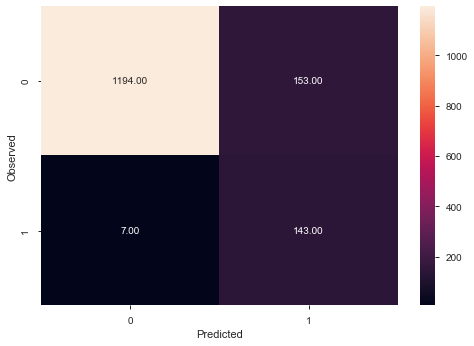

None

Recall: 0.9533333333333334

Precision: 0.4831081081081081

F1 Score: 0.641255605381166

Roc Auc Score: 0.9198737936154417


In [88]:
print("Trainig accuracy",logreg.score(X_train,y_train))  
print()
print("Testing accuracy",logreg.score(X_test, y_test))
print()
print('Confusion Matrix')
print(draw_cm(y_test,y_predict))
print()
print("Recall:",recall_score(y_test,y_predict))
print()
print("Precision:",precision_score(y_test,y_predict))
print()
print("F1 Score:",f1_score(y_test,y_predict))
print()
print("Roc Auc Score:",roc_auc_score(y_test,y_predict))

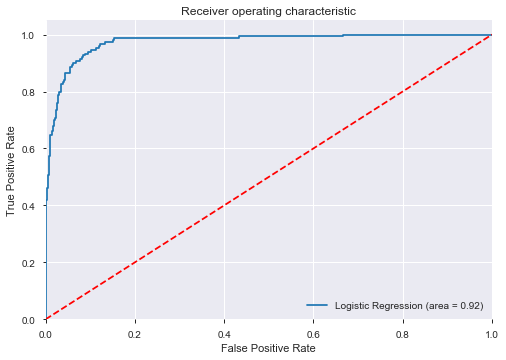

In [89]:
# AUC ROC curve
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve

logit_roc_auc = roc_auc_score(y_test, logreg.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test, logreg.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

In [90]:
# Checking Parameters of logistic regression

logreg.get_params()

{'C': 0.5,
 'class_weight': 'balanced',
 'dual': False,
 'fit_intercept': True,
 'intercept_scaling': 1,
 'l1_ratio': None,
 'max_iter': 100,
 'multi_class': 'warn',
 'n_jobs': None,
 'penalty': 'l2',
 'random_state': 42,
 'solver': 'newton-cg',
 'tol': 0.0001,
 'verbose': 0,
 'warm_start': False}

[0.01, 0.1, 0.25, 0.5, 0.75, 1]

AxesSubplot(0.125,0.125;0.775x0.755)

[0.798, 0.896, 0.902, 0.902, 0.9, 0.899]


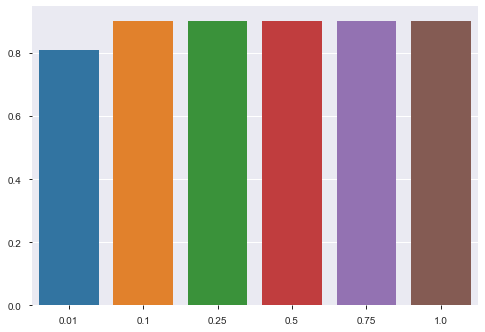

In [91]:
# 5. Give your reasoning on how can the model perform better? (10 marks) 
# Running a loop to check different values of 'C'

train_score=[]                                 
test_score=[]
C=[0.01,0.1,0.25,0.5,0.75,1]

for i in C:
    model = LogisticRegression(random_state=42,penalty='l1', class_weight='balanced', C=i)  # changing values of C
    model.fit(X_train, y_train) 
    y_predict = model.predict(X_test)     
    train_score.append(round(model.score(X_train,y_train),3)) # appending training accuracy in a blank list for every run of the loop
    test_score.append(round(model.score(X_test, y_test),3))   # appending testing accuracy in a blank list for every run of the loop
    
print(C)
print()
print(sns.barplot(x=C, y=train_score))
print()
print(test_score)

['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga']

AxesSubplot(0.125,0.125;0.775x0.755)

[0.951, 0.891, 0.892, 0.9, 0.9]


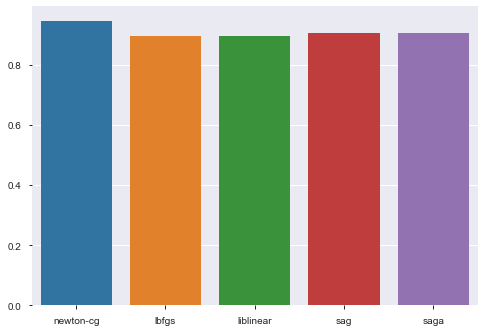

In [92]:
# Running a loop to check different values of 'solver'
# solver can only be used with l2, only 'liblinear' works with both 'l1' and 'l2'

train_score=[]
test_score=[]
solver=['newton-cg','lbfgs','liblinear','sag','saga']

for i in solver:
    model = LogisticRegression(random_state=42,penalty='l2',C=0.5,solver=i)  # changing values of solver
    model.fit(X_train, y_train) 
    y_predict = model.predict(X_test)     
    train_score.append(round(model.score(X_train, y_train),3))
    test_score.append(round(model.score(X_test, y_test),3))
    
print(solver)
print()
print(sns.barplot(x=solver, y=train_score))
print()
print(test_score)

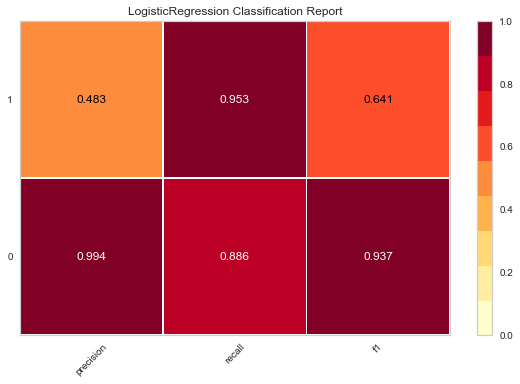

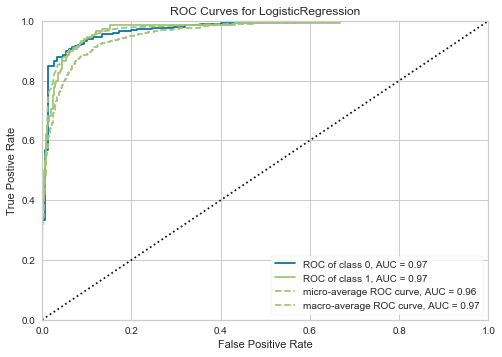

In [93]:
# Visualize model performance

from yellowbrick.classifier import ClassificationReport, ROCAUC

viz = ClassificationReport(logreg)
viz.fit(X_train, y_train)
viz.score(X_test, y_test)
viz.show()

roc = ROCAUC(logreg)
roc.fit(X_train, y_train)
roc.score(X_test, y_test)
roc.show()

# Confusion Matrix

*True Positive (observed=1,predicted=1):*

Predicted that customer will be purchase a loan

*False Positive (observed=0,predicted=1):*

Predicted that customer will not purchase a loan and the customer did purchase

*True Negative (observed=0,predicted=0):*

Predicted that customer will not purchase a loan

*False Negative (observed=1,predicted=0):*

Predicted that customer will purchase a loan and the customer did not purchase

# Observations

- Having the algo predict loan purchasers incorrectly results in marketing fee loss (\$10)
- Having the algo predict non loan purchasers incorrectly results in compound interest fee loss (\$10^n)

Here the bank wants liability customers to purchase loans i.e. less number of **False Negatives**, if **FN** is high bank would lose potential compound interest on loans. The bank is looking to do the marketing with a minimal budget cost. Hence Recall is the important metric.

In case of **False Positives** the bank will lose a little money from the marketing budget but that is okay because the bank would want to spend a linear amount of money to see exponential return in compound interest.

After achieving the desired recall we can deploy the model for practical use. As in the bank can now predict the probablity of a liability customer buying a personal loan. They can use the model for upcoming customers.